# Minimum Energy Point of Quantum Harmonic Oscillators

## Frederico Wieser 18018699

In this notebook we will use NumPy, SciPy and MatPlotLib to explore quantum harmonic oscillators, their wavefunctions, corresponding energy, and gradients.

We will use atomic untis in this notebook, for effeciency in our calculations and clarity in the work.

Which correpsonds to $ \hbar = m_e = 1 $

We have been given two systems, a one dimensional wavefunction and two dimensional wavefunction. Using this inforation, we also then know the correspond energy equations of the 2 systems.

By using the bisection method, a root-finding method, and the Scipy optimize function we are then able to find the roots of the energy gradient for the 1D wavefunction and 2D wavefunction.

Which allows us to know where the energy of the system is a minimum for alpha and beta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Section on 1D QHO

Our 1 dimensional wavefunction is

$$ \psi(x) = (2 \alpha / \pi)^{1/4} e^{-\alpha x^2} $$

which can be shown to have a corresponding energy of

$$ E_{GS} = \frac{\alpha}{2} + \frac{1}{8\alpha} $$

Using the information above we can calculate that the minimum energy with respect to alpha is at the point where

$$ \frac{dE}{d \alpha} = 0 = \frac{1}{2} - \frac{1}{8 \alpha^2} $$

In [2]:
def bisection(fun,a,b,tol):
    """
    A root-finding algorithm for functions where you input
    values of upper and lower bound, which the root lies between.
    Returning the number of itterations to satisfy tolerance,
    and estimate for c, the root.
    
    Inputs:
    a = lower bound
    b = upper bound
    tol = tolerance of uncertainty in c
    fun = function you are finding root
    
    Returns:
    i = the number of iterations it takes to satisfy the tolerance
    c = the estimation for the root
    """
    
    tol_value = abs(a-b)
    
    i = 0 # Counter
    
    while tol_value > tol:
    
        # Calculate C
        c = (a + b)/2

        # Evaluate f(a) and f(b)
        f_a = fun(a)
        f_b = fun(b)
        f_c = fun(c)

        # Calculate signs 
        f_a_sign = np.sign(f_a)
        f_c_sign = np.sign(f_c)

        # If statement to replace a or b with c
        # depending on sign of f_c
        if f_a_sign == f_c_sign:
            a = c
        else:
            b = c
        
        i += 1
        tol_value = abs(a-b)
    
    return c, i

In [3]:
def QHO_E(alpha):
    """
    Energy function for 1-Dimensional Wave Equation.
    """
    
    a = alpha
    
    E_GS =  (a/2) + (1/(8*a))
    
    return E_GS

In [4]:
def QHO_grad(alpha):
    """
    Energy gradient function for 1-Dimensional Wave Equation, with
    respect to alpha.
    """
    
    a = alpha
    
    dE_GS_da = 0.5 - (1/(8*(a**2)))
    
    return dE_GS_da

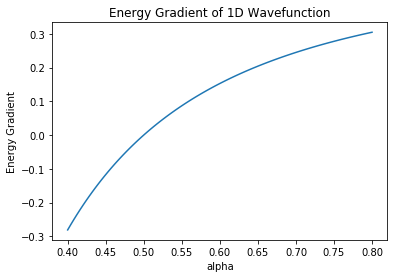

In [5]:
# Defining x-values for the 1D energy function to be plotted over
x = np.linspace(0.4,0.8,100)

plt.title("Energy Gradient of 1D Wavefunction")
plt.xlabel("alpha")
plt.ylabel("Energy Gradient")
plt.plot(x, QHO_grad(x))

In [6]:
# Define brackets and tolerance
a = 0.45
b = 0.55
tol = 0.01

# Output result
alpha_0, n = bisection(QHO_grad,a,b,tol)
print(alpha_0, n)

0.49375 4


From the above results we can tell that the root value calculated is

$$ \alpha_0 = 0.49375 \approx 0.5 $$ 

which took the bisection algorithm 4 itterations to calculate.

### Section on 2D QHO

Our 2 dimensional wavefunction is

$$ \psi(x, y) = (2 \alpha / \pi)^{1/4} e^{-\alpha x^2} (2 \beta / \pi)^{1/4} e^{-\beta x^2} $$

which can be shown to have a corresponding energy of

$$ E_{GS} = \frac{\alpha}{2} + \frac{1}{8\alpha} + \frac{\beta}{2} + \frac{1}{8\beta} $$

Using the information above we can calculate that the minimum energy with respect to alpha is at the point where

$$ \frac{\partial E}{\partial \alpha} = 0 = \frac{1}{2} - \frac{1}{8 \alpha^2} $$

$$ \frac{\partial E}{\partial \beta} = 0 = \frac{1}{2} - \frac{1}{8 \beta^2} $$


In [7]:
def QHO_2D_E(x):
    """
    Energy function for 2-Dimensional Wave Equation.
    """
    
    a = x[0]
    b = x[1]
    
    a2D, b2D = np.meshgrid(a, b)
    
    E_GS = (a2D/2) + (1/(8*a2D)) + (b2D/2) + (1/(8*b2D))
    
    return E_GS

In [8]:
def QHO_2D_grad(x):
    """
    Energy gradient function for 2-Dimensional Wave Equation, with
    respect to alpha.
    """

    a = x[0]
    b = x[1]
    
    dE_GS_da = 0.5 - (1/(8*(a**2)))
    
    dE_GS_db = 0.5 - (1/(8*(b**2)))
    
    return np.array([dE_GS_da ,dE_GS_db])

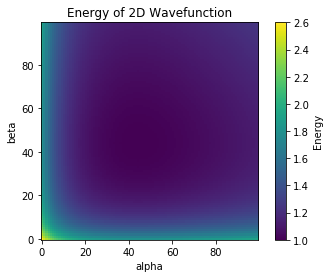

In [9]:
# Defining our variables for the 2D wavefunction

alpha = np.linspace(0.1,1,100)
beta = np.linspace(0.1,1,100)

x = np.array([alpha, beta])

E = QHO_2D_E(x)

plt.title("Energy of 2D Wavefunction")
plt.xlabel("alpha")
plt.ylabel("beta")
plt.imshow(E, origin='lower')
plt.colorbar().set_label("Energy")

In [10]:
# Using SciPy to find the point where the energy of
# the quantum harmonic oscillator in 2D
from scipy import optimize
x0 = np.array([0.45, 0.55])
opt_result = optimize.minimize(QHO_2D_E, x0, method='CG', jac=QHO_2D_grad) # Fill in appropriate functions for 1st and 4th arguments


print(opt_result.x)
print(opt_result.nit)
print(opt_result.success)

[0.5 0.5]
4
True


From the above results we can tell that the root value calculated is

$$ \alpha_0 = 0.5 $$
$$ \beta_0 = 0.5 $$

which took the SciPy algorithm 4 itterations to calculate. We are also able to see that the algorithm ran successfully with the printing of the opt_result.success

### Conclusions

In this notebook I learned how to find solutions to single variable functions using the bisection method. I also learned how to find solutions when looking at multivariable functions using the SciPy optimize class.